## Bivariate and Multivariate pdfs <a class="anchor" id="two"></a>

Up to now we have been dealing with one-dimensional distribution functions.  Let's now consider a two dimensional distribution $h(x,y)$ where $$\int_{-\infty}^{\infty}dx\int_{-\infty}^{\infty}h(x,y)dy = 1.$$  $h(x,y)$ is telling us the probability that $x$ is between $x$ and $dx$ and *also* that $y$ is between $y$ and $dy$.

Then we have the following definitions:

$$\mu_x = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}x h(x,y) dx dy$$

$$\mu_y = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}y h(x,y) dx dy$$

$$\sigma^2_x = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}(x-\mu_x)^2 h(x,y) dx dy$$

$$\sigma^2_y = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}(y-\mu_y)^2 h(x,y) dx dy$$

$$\sigma_{xy} = Cov(x,y) = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}(x-\mu_x) (y-\mu_y) h(x,y) dx dy$$

If $x$ and $y$ are uncorrelated, then we can treat the system as two independent 1-D distributions.  This means that choosing a range on one variable has no effect on the distribution of the other.


We can write a 2-D Gaussian pdf as
$$p(x,y|\mu_x,\mu_y,\sigma_x,\sigma_y,\sigma_{xy}) = \frac{1}{2\pi \sigma_x \sigma_y \sqrt{1-\rho^2}} \exp\left(\frac{-z^2}{2(1-\rho^2)}\right),$$

where $$z^2 = \frac{(x-\mu_x)^2}{\sigma_x^2} + \frac{(y-\mu_y)^2}{\sigma_y^2} - 2\rho\frac{(x-\mu_x)(y-\mu_y)}{\sigma_x\sigma_y},$$

with $$\rho = \frac{\sigma_{xy}}{\sigma_x\sigma_y}$$
as the **(dimensionless) correlation coefficient**.

If $x$ and $y$ are perfectly correlated then $\rho=\pm1$ and if they are uncorrelated, then $\rho=0$.

**The pdf is now not a histogram, but rather a series of contours in the $x-y$ plane.**   

These are centered at $(x=\mu_x, y=\mu_y)$ and are tilted at angle $\alpha$, which is given by
$$\tan(2 \alpha) = 2\rho\frac{\sigma_x\sigma_y}{\sigma_x^2-\sigma_y^2} = 2\frac{\sigma_{xy}}{\sigma_x^2-\sigma_y^2}.$$

For example (Ivezic, Figure 3.22):
![Ivezic, Figure 3.22](http://www.astroml.org/_images/fig_bivariate_gaussian_1.png)

The ellpse is tilted because of the covariance. 



We can define new coordinate axes that are aligned with the minimum and maximum widths of the distribution. (Or in different terminology, the semi-minor and semi-major axes of the ellipse). These are called the **principal axes** and are given by

$$P_1 = (x-\mu_x)\cos\alpha + (y-\mu_y)\sin\alpha,$$

and

$$P_2 = -(x-\mu_x)\sin\alpha + (y-\mu_y)\cos\alpha.$$

The widths in this (rotated) coordinate system are

$$\sigma^2_{1,2} = \frac{\sigma_x^2+\sigma_y^2}{2}\pm\sqrt{\left(\frac{\sigma_x^2-\sigma_y^2}{2}\right)^2 + \sigma^2_{xy}}.$$

Note that **the correlation vanishes in this coordinate system (by definition)** and the bivariate Gaussian is just a product of two univariate Gaussians.  

This concept will be crucial for understanding ***Principal Component Analysis*** when we will get to later, where PCA extends this idea to even more dimensions.

In the univariate case we used $\overline{x}$ and $s$ to *estimate* $\mu$ and $\sigma$.  In the bivariate case we estimate 5 parameters: $(\overline{x},\overline{y},s_x,s_y,s_{xy})$.  

As with the univariate case, it is important to realize that **outliers can bias these estimates and that it may be more appropriate to use the median rather than the mean as a more robust estimator for $\mu_x$ and $\mu_y$**.  

Similarly we want robust estimators for the other parameters of the fit.  We won't go into that in detail right now, but see Ivezic, Figure 3.23 for an example:

![Ivezic, Figure 3.23](http://www.astroml.org/_images/fig_robust_pca_1.png)

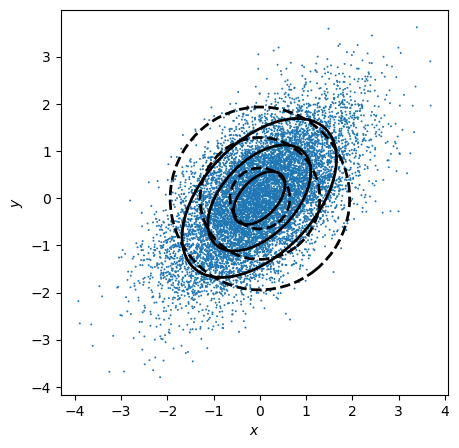

In [5]:
# Base code drawn from Ivezic, Figure 3.22, edited by G. Richards to simplify the example

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
from astroML.stats.random import bivariate_normal
from astroML.stats import fit_bivariate_normal

# directional means
mux = 0
muy = 0

# directional standard deviations
sigx = 1.0
sigy = 1.0

# covariance
sigxy = 0.6

#------------------------------------------------------------
# Create 10,000 points from a multivariate normal distribution
mean = np.array([mux, muy])
cov = np.array([[sigx**2, sigxy], [sigxy, sigy**2]])
x, y = np.random.multivariate_normal(mean, cov, 10000).T

#------------------------------------------------------------
# Add 2000 outliers drawn from a 5 times wider distribution
# with opposite covariance
xout, yout = np.random.multivariate_normal(mean, 
                                           5*cov*np.array([[1,-1],[-1,1]]), 
                                           2000).T

xt = np.append(x,xout)
yt = np.append(y,yout)

# Fit those data with a bivariate normal distribution
# Use robust and non-robust statistics estimates
mean_nr, sigma_x_nr, sigma_y_nr, alpha_nr = fit_bivariate_normal(xt, yt, robust=False)
mean_r, sigma_x_r, sigma_y_r, alpha_r = fit_bivariate_normal(xt, yt, robust=True)

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

plt.scatter(x,y,s=2,edgecolor='none')

# draw 1, 2, 3-sigma ellipses over the distribution
for N in (1, 2, 3):
    ax.add_patch(Ellipse(mean_nr, N * sigma_x_nr, N * sigma_y_nr, 
                         angle=alpha_nr * 180./np.pi, lw=2, 
                         ec='k', fc='none', ls='dashed'))
    ax.add_patch(Ellipse(mean_r, N * sigma_x_r, N * sigma_y_r, 
                         angle=alpha_r * 180./np.pi, lw=2, 
                         ec='k', fc='none'))
    
ax.set_xlabel('$x$');
ax.set_ylabel('$y$');

The non-robust estimates (***dashed lines***) give biased sigma ellipses due to the outliers. The robust estimates (***solid lines***) do much better.


We can generalize the way we describe **Gaussian distributions in multiple dimensions**, $M$, through the elegance of linear algebra. Instead of writing everything in terms of separate coordinates, we can bundle everything together in an $M$-dimensional coordinate vector $\vec{x}$, mean vector $\vec{\mu}$, and covariance matrix $\mathbf{C} = E([\vec{x}-\vec{\mu}][\vec{x}-\vec{\mu}]^T)$.

$$p(\vec{x}|\vec{\mu},\mathbf{C}) = \frac{1}{\sqrt{\mathrm{det}(2\pi\mathbf{C})}} \exp\left[-\frac{1}{2}(\vec{x}-\vec{\mu})^T \mathbf{C}^{-1} (\vec{x}-\vec{\mu}) \right] $$

where 

$$ C_{kj} = \int_{-\infty}^\infty (x^k-\mu^k)(x^j-\mu^j)p(\vec{x}|\vec{\mu},\mathbf{C})\,d^M x $$

and 

$$ (\vec{x}-\vec{\mu})^T \mathbf{C}^{-1} (\vec{x}-\vec{\mu}) = \sum_{k=1}^M \sum_{j=1}^M [\mathbf{C}^{-1}]_{kj}(x^k-\mu^k)(x^j-\mu^j) $$

# Correlation



### Correlation != Covariance

##### Covariance:
$$ \text{Cov}(X,Y) = E[(X - \mu_{x})(Y - \mu_{y})] $$

##### Correlation:

$$ \rho = \frac{\text{Cov}(X,Y)}{\sqrt{\text{Var}(X)\text{Var}(Y)}} $$

where $\rho$ is an example *correlation coefficient*. Here, $\rho = +1$ implies perfectly correlated variables, $\rho = 0$ implies completely uncorrelated variables, and $\rho = -1$ implies perfectly anti-correlated variables (one reduces as the other increases).

#### Correlation can be defined via various other metrics a.k.a. *correlation coefficients*:

The one given above ($\rho$) is the....

### 1) Pearson's coefficient

Given two length-$N$ samples of data $\{x_i\}$ and $\{y_i\}$, Pearson's correlation coefficient is defined as

$$ r = \frac{\sum_{i=1}^N (x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum_{i=1}^N (x_i-\bar{x})^2}\sqrt{\sum_{i=1}^N (y_i-\bar{y})^2}} $$

where $-1\leq r\leq 1$, and $r=0$ for uncorrelated variables.

If the pairs $(x_i,y_i)$ are drawn from uncorrelated univariate Gaussian distributions, then the distribution of $r$ follows a Student's $t$ distribution with $k=N-2$ degrees of freedom and $t = r\sqrt{(N-2)/(1-r^2)}$.

With this known "null hypothesis" distribution, a measured $r$ can be interpreted in terms of the significance with which we can reject the variables being correlated, e.g., if $N=10$ then the probability that a value of $r\geq 0.72$ arises just by chance noise fluctuations is $1\%$. 

=> One can use $r=0.72$ as a threshold as long as you're happy with a $1\%$ chance of it being a chance correlations; if not, increase your threshold.

There are two big problems with Pearson's coefficient though:
- It does not incorporate measurement uncertainties on the data (can be systematic or statistical, just that you cannot input any *known* $\Delta X$ or $\Delta Y$ into the calculation)
- It is highly susceptible to outliers.

### 2) Spearman's coefficient

Similar definition to Pearson's, with sample values replaced by their cumulative ranks. As we've seen, cumulative statistics based on rank are more robust estimators than ones that use the actual sample values. The samples in each dataset are ranked from $1,\ldots,N$ in ascending order, with the largest value given the rank $N$. 

$$ r_S = \frac{\sum_{i=1}^N (R^x_i-\bar{R^x})(R^y_i-\bar{R^y})}{\sqrt{\sum_{i=1}^N (R^x_i-\bar{R^x})^2}\sqrt{\sum_{i=1}^N (R^y_i-\bar{R^y})^2}}. $$

The distribution of $r_S$ is the same as for Pearson's, except in the definition of the test statsitic $t$, $r$ is replaced by $r_S$.

Q: How does this solve the problems of Pearson? => Since this is a cumulative statistic, outliers are taken care of since the difference between the rank of an outlier and the rank mean will not be as high as that between an outlier and the overall mean.

Spearman's coefficient also follows the student-t distribution for the null hypothesis, as above.

### 3) Kendall's coefficient

Kendall's coefficient uses the sample ranks, but does not take rank differences like in Spearman's coefficient. Instead, we compare the relative number of *concordant* and *discordant* pairs. 

**Concordant pairs** are where the differences in values between a pair of samples $j$ and $k$ have the same sign in $x$ and $y$, i.e., $(x_j-x_k)(y_j-y_k)>0$.

**Discordant pairs** are where the differences in values between a pair of samples $j$ and $k$ have the different signs in $x$ and $y$, i.e., $(x_j-x_k)(y_j-y_k)<0$.

*For perfectly correlated data, all $N(N-1)/2$ sample pairs will be concordant. For perfectly anti-correlated data, all pairs will be discordant.* 

Kendall's $\tau$ is then computed as

$$ \tau = 2\frac{N_c-N_d}{N(N-1)}.$$